In [37]:
from torch.utils.data import Dataset
from PIL import Image
import os
import torch
import torchvision.transforms as T
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

### Dataset class

In [38]:
class DeepCrackDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = sorted(os.listdir(image_dir))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.images[idx])
        mask_path = os.path.join(self.mask_dir, self.images[idx].replace('.jpg', '.png'))

        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # grayscale mask

        # Convert mask to binary (0 or 1)
        #mask = np.array(mask)
        #mask = (mask > 127).astype(np.float32)
        #mask = torch.tensor(mask).unsqueeze(0)  # shape: [1, H, W]

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented["image"]
            mask = augmented["mask"]

        return image, mask


In [39]:
train_dataset = DeepCrackDataset(
    image_dir='./DeepCrack/dataset/DeepCrack/train_img',
    mask_dir='./DeepCrack/dataset/DeepCrack/train_lab',
    transform=None
)

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)

test_dataset = DeepCrackDataset(
    image_dir='./DeepCrack/dataset/DeepCrack/train_img',
    mask_dir='./DeepCrack/dataset/DeepCrack/train_lab',
    transform=None
)

test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=True)

# EDA

## Basic statistics

In [40]:
print(f"Total train images: {len(train_dataset)}")
print(f"Total test images: {len(test_dataset)}")

# Get shapes
shapes = []
for image, mask in train_dataset:
    shapes.append(image.size)  # (width, height)

widths, heights = zip(*shapes)
print(f"Train images: Min size: {min(widths)}x{min(heights)}, Max size: {max(widths)}x{max(heights)}")

shapes = []
for image, mask in test_dataset:
    shapes.append(image.size)  # (width, height)

widths, heights = zip(*shapes)
print(f"Test images: Min size: {min(widths)}x{min(heights)}, Max size: {max(widths)}x{max(heights)}")

Total train images: 300
Total test images: 300
Train images: Min size: 544x384, Max size: 544x384
Test images: Min size: 544x384, Max size: 544x384


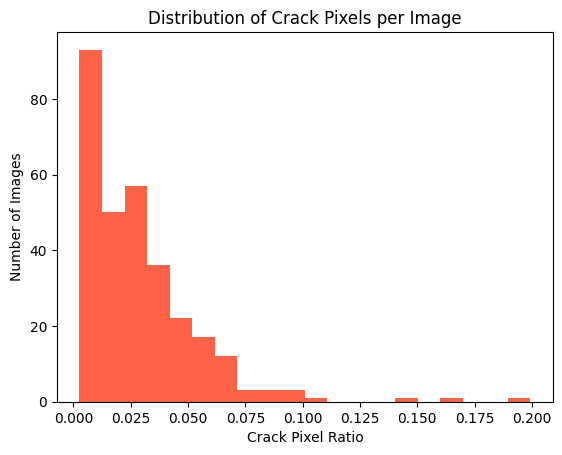

In [41]:
import matplotlib.pyplot as plt

crack_pixels = []
background_pixels = []

for image, mask in train_dataset:
    mask_np = np.array(mask)
    crack = np.sum(mask_np > 127)
    total = mask_np.size
    crack_pixels.append(crack)
    background_pixels.append(total - crack)

# Plot ratio
ratios = [c / (c + b) for c, b in zip(crack_pixels, background_pixels)]
plt.hist(ratios, bins=20, color='tomato')
plt.xlabel("Crack Pixel Ratio")
plt.ylabel("Number of Images")
plt.title("Distribution of Crack Pixels per Image")
plt.show()


### Plot some images and masks

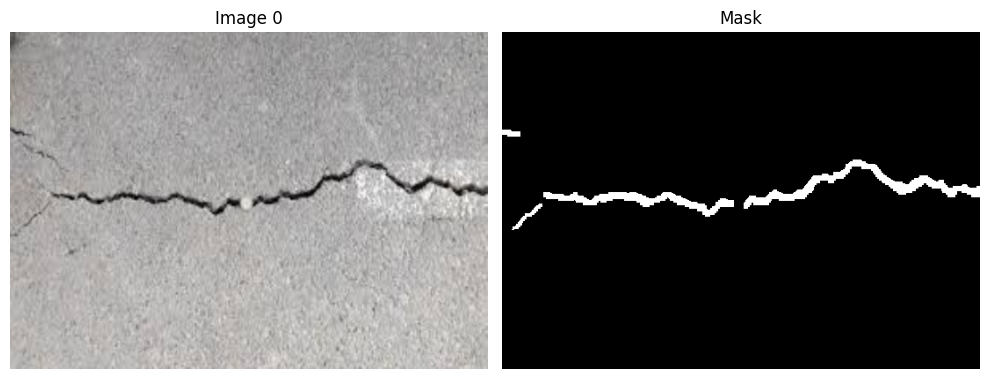

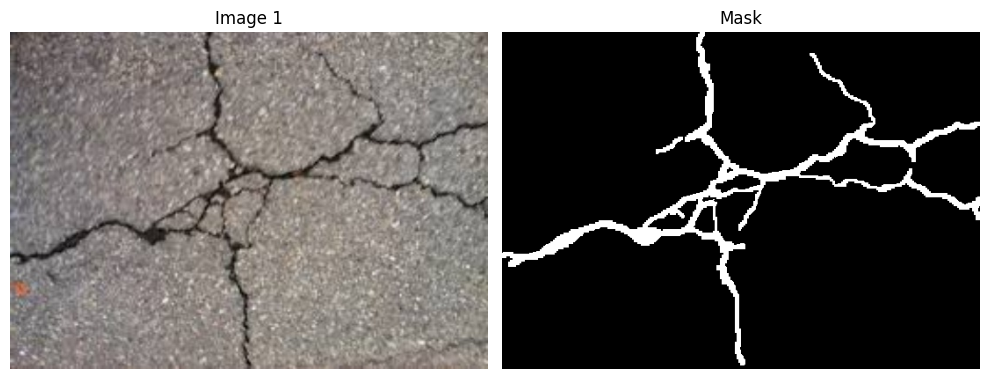

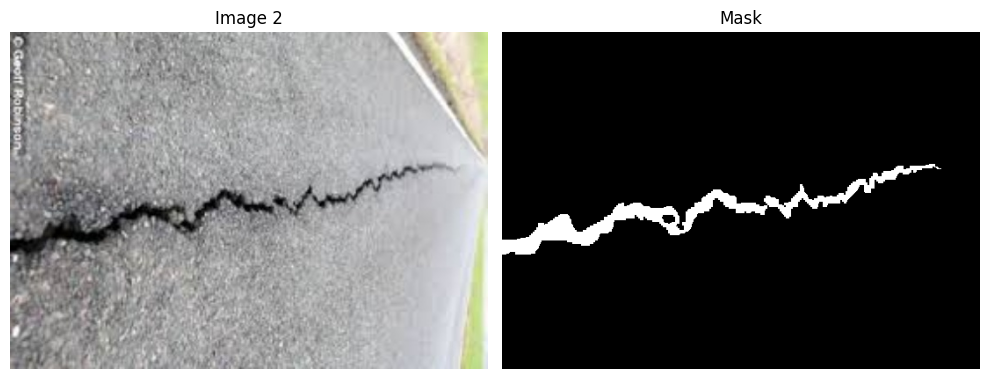

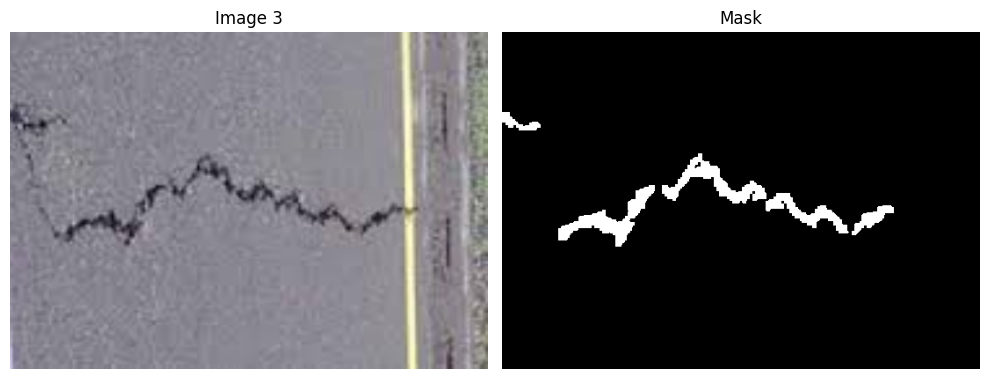

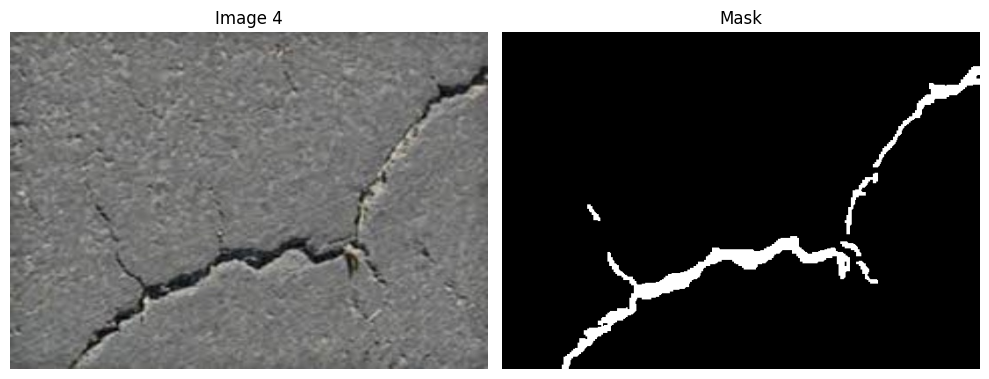

In [42]:

n_samples = 5
for i in range(n_samples):
    image, mask = train_dataset[i]
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    axs[0].imshow(image)
    axs[0].set_title(f"Image {i}")
    axs[0].axis("off")

    axs[1].imshow(mask, cmap='gray')
    axs[1].set_title("Mask")
    axs[1].axis("off")

    plt.tight_layout()
    plt.show()
